![MLU Logo](../data/MLU_Logo.png)

# <a name="0">Machine Learning Accelerator - Tabular Data - Lecture 1</a>


## Exploratory data analysis

In this notebook, we go through basic steps of exploratory data analysis (EDA), performing initial data investigations to discover patterns, spot anomalies, and look for insights to inform later ML modeling choices.

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Overall Statistics</a>
3. <a href="#3">Univariate Statistics: Basic Plots</a>
4. <a href="#4">Multivariate Statistics: Scatter Plots and Correlations</a>
5. <a href="#5">Handling Missing Values</a>
    * <a href="#51">Drop columns with missing values</a>
    * <a href="#52">Drop rows with missing values</a>
    * <a href="#53">Impute (fill-in) missing values with .fillna()</a>
    * <a href="#54">Impute (fill-in) missing values with sklearn's SimpleImputer</a>
    
__Austin Animal Center Dataset__:

In this exercise, we are working with pet adoption data from __Austin Animal Center__. We have two datasets that cover intake and outcome of animals. Intake data is available from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) and outcome is from [here](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Outcomes/9t4d-g238). 

In order to work with a single table, we joined the intake and outcome tables using the "Animal ID" column and created a single __review.csv__ file. We also didn't consider animals with multiple entries to the facility to keep our dataset simple. If you want to see the original datasets and the merged data with multiple entries, they are available under data/review folder: Austin_Animal_Center_Intakes.csv, Austin_Animal_Center_Outcomes.csv and Austin_Animal_Center_Intakes_Outcomes.csv.

__Dataset schema:__ 
- __Pet ID__ - Unique ID of pet
- __Outcome Type__ - State of pet at the time of recording the outcome (0 = not placed, 1 = placed). This is the field to predict.
- __Sex upon Outcome__ - Sex of pet at outcome
- __Name__ - Name of pet 
- __Found Location__ - Found location of pet before entered the center
- __Intake Type__ - Circumstances bringing the pet to the center
- __Intake Condition__ - Health condition of pet when entered the center
- __Pet Type__ - Type of pet
- __Sex upon Intake__ - Sex of pet when entered the center
- __Breed__ - Breed of pet 
- __Color__ - Color of pet 
- __Age upon Intake Days__ - Age of pet when entered the center (days)
- __Age upon Outcome Days__ - Age of pet at outcome (days)


In [1]:
%%capture
%pip install -q -r ../requirements.txt

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [2]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('../data/review/review_dataset.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (95485, 13)


## 2. <a name="2">Overall Statistics</a>
(<a href="#0">Go to top</a>)

We will look at number of rows, columns and some simple statistics of the dataset.

In [3]:
# Print the first five rows
# NaN means missing data
df.head()

,Pet ID,Outcome Type,Sex upon Outcome,Name,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Chunk,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,Gizmo,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,NaN,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,*Donatello,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,*Zeus,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95485 entries, 0 to 95484
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Pet ID                 95485 non-null  object 
 1   Outcome Type           95485 non-null  float64
 2   Sex upon Outcome       95484 non-null  object 
 3   Name                   59138 non-null  object 
 4   Found Location         95485 non-null  object 
 5   Intake Type            95485 non-null  object 
 6   Intake Condition       95485 non-null  object 
 7   Pet Type               95485 non-null  object 
 8   Sex upon Intake        95484 non-null  object 
 9   Breed                  95485 non-null  object 
 10  Color                  95485 non-null  object 
 11  Age upon Intake Days   95485 non-null  int64  
 12  Age upon Outcome Days  95485 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 9.5+ MB


In [5]:
# This prints basic statistics for numerical columns
df.describe()

,Outcome Type,Age upon Intake Days,Age upon Outcome Days
count,95485.000000,95485.000000,95485.000000
mean,0.564005,703.436959,717.757313
std,0.495889,1052.252197,1055.023160
min,0.000000,0.000000,0.000000
25%,0.000000,30.000000,60.000000
50%,1.000000,365.000000,365.000000
75%,1.000000,730.000000,730.000000
max,1.000000,9125.000000,9125.000000


Let's separate model features and model target.

In [6]:
print(df.columns)

Index(['Pet ID', 'Outcome Type', 'Sex upon Outcome', 'Name', 'Found Location',
       'Intake Type', 'Intake Condition', 'Pet Type', 'Sex upon Intake',
       'Breed', 'Color', 'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')


In [7]:
model_features = df.columns.drop('Outcome Type')
model_target = 'Outcome Type'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color',
       'Age upon Intake Days', 'Age upon Outcome Days'],
      dtype='object')
Model target:  Outcome Type


We can explore the features set further, figuring out first what features are numerical or categorical. Beware that some integer-valued features could actually be categorical features, and some categorical features could be text features. 

In [8]:
import numpy as np
numerical_features_all = df[model_features].select_dtypes(include=np.number).columns
print('Numerical columns:',numerical_features_all)

print('')

categorical_features_all = df[model_features].select_dtypes(include='object').columns
print('Categorical columns:',categorical_features_all)


Numerical columns: Index(['Age upon Intake Days', 'Age upon Outcome Days'], dtype='object')

Categorical columns: Index(['Pet ID', 'Sex upon Outcome', 'Name', 'Found Location', 'Intake Type',
       'Intake Condition', 'Pet Type', 'Sex upon Intake', 'Breed', 'Color'],
      dtype='object')


## 3. <a name="3">Basic Plots</a>
(<a href="#0">Go to top</a>)

In this section, we examine our data with plots. Important note: These plots ignore null (missing) values. We will learn how to deal with missing values in the next section.


__Bar plots__: These plots show counts of categorical data fields. __value_counts()__ function yields the counts of each unique value. It is useful for categorical variables.

First, let's look at the distribution of the model target.

In [9]:
df[model_target].value_counts()

Outcome Type
1.0    53854
0.0    41631
Name: count, dtype: int64

__plot.bar()__ addition to the __value_counts()__ function makes a bar plot of the values.

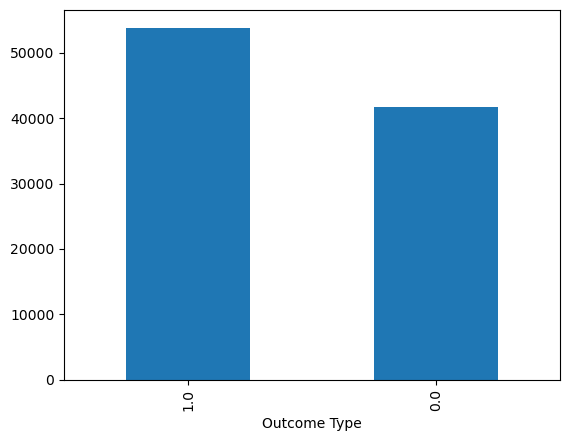

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

Now onto the categorical features, exploring number of unique values per feature.

In [11]:
for c in categorical_features_all: 
    print(df[c].value_counts())
    

Pet ID
A815419    1
A794011    1
A776359    1
A674754    1
A689724    1
          ..
A757815    1
A792258    1
A802723    1
A705205    1
A766886    1
Name: count, Length: 95485, dtype: int64
Sex upon Outcome
Neutered Male    30244
Spayed Female    28145
Intact Female    13724
Intact Male      13646
Unknown           9725
Name: count, dtype: int64
Name
Bella        338
Luna         313
Max          311
Daisy        239
Lucy         223
            ... 
Moebius        1
*Alastair      1
Cochise        1
Blou           1
*Shinobi       1
Name: count, Length: 17468, dtype: int64
Found Location
Austin (TX)                                            14833
Travis (TX)                                             1402
7201 Levander Loop in Austin (TX)                        644
Outside Jurisdiction                                     607
Del Valle (TX)                                           426
                                                       ...  
1704 Sanchez St in Austin (TX)       

Based on the number of unique values (unique IDs for example won't be very useful to visualize, for example), for some categorical features, let's see some bar plot visualizations. For simplicity and speed, here we only show box plots for those features with less than 50 unique values.

Sex upon Outcome


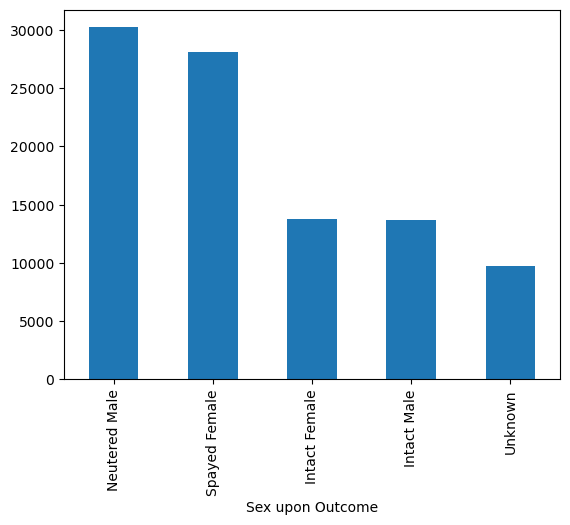

Intake Type


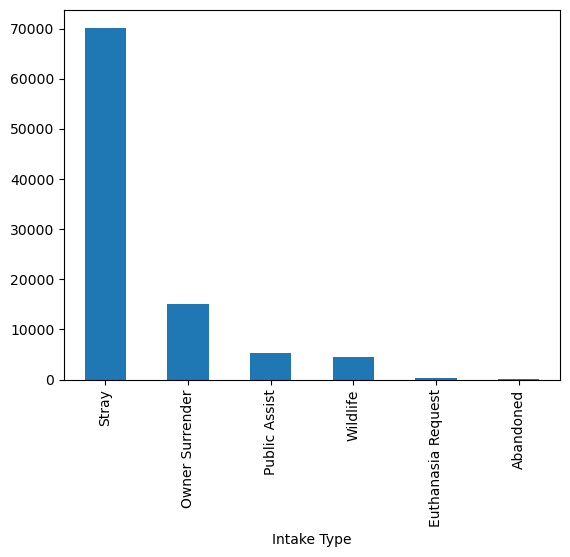

Intake Condition


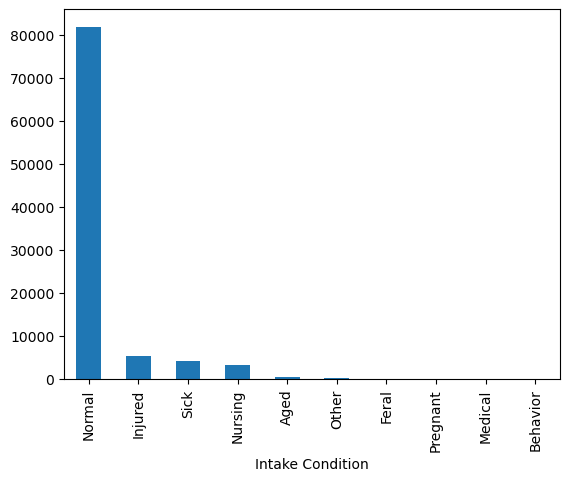

Pet Type


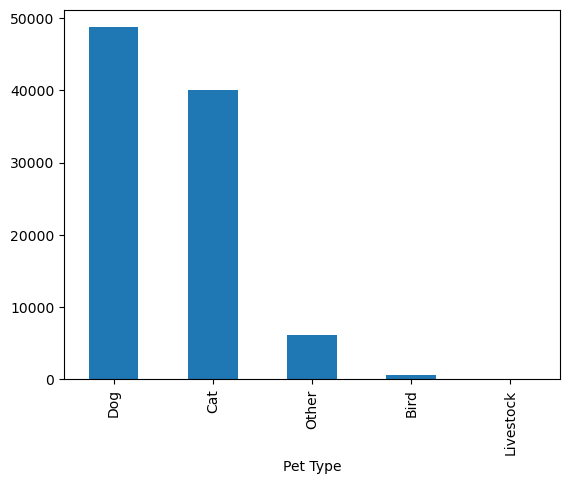

Sex upon Intake


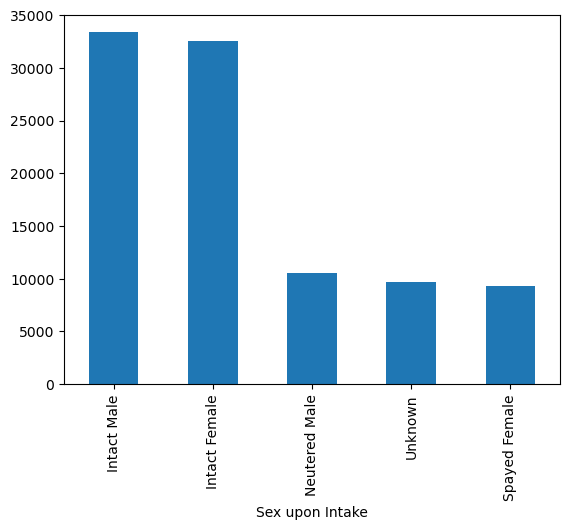

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in categorical_features_all:
    if len(df[c].value_counts()) < 50:
        print(c)
        df[c].value_counts().plot.bar()
        plt.show()

__Histograms:__ Histograms show distribution of numeric data. Data is divided into "buckets" or "bins".

Age upon Intake Days


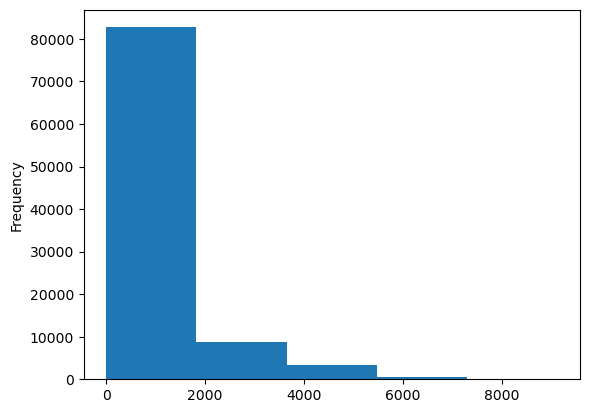

Age upon Outcome Days


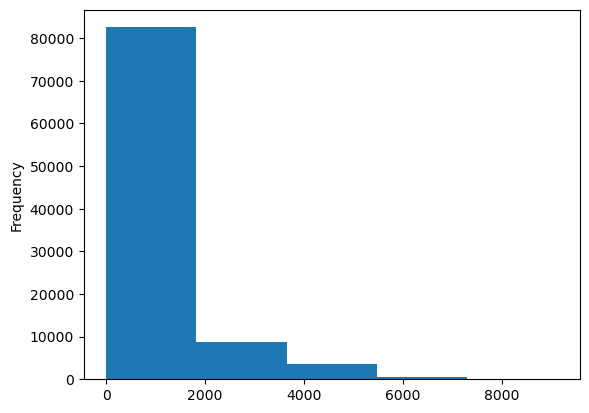

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=5)
    plt.show()

If for some histograms the values are heavily placed in the first bin, it is good to check for outliers, either checking the min-max values of those particular features and/or explore value ranges.

In [14]:
for c in numerical_features_all:
    print(c)
    print('min:', df[c].min(), 'max:', df[c].max())

Age upon Intake Days
min: 0 max: 9125
Age upon Outcome Days
min: 0 max: 9125


With __value_counts()__ function, we can increase the number of histogram bins to 10 for more bins for a more refined view of the numerical features.

In [15]:
for c in numerical_features_all: 
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-9.126, 912.5]     74835
(912.5, 1825.0]     10647
(1825.0, 2737.5]     3471
(2737.5, 3650.0]     3998
(3650.0, 4562.5]     1234
(4562.5, 5475.0]     1031
(5475.0, 6387.5]      183
(6387.5, 7300.0]       79
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: count, dtype: int64
Age upon Outcome Days
(-9.126, 912.5]     74642
(912.5, 1825.0]     10699
(1825.0, 2737.5]     3465
(2737.5, 3650.0]     4080
(3650.0, 4562.5]     1263
(4562.5, 5475.0]     1061
(5475.0, 6387.5]      187
(6387.5, 7300.0]       81
(7300.0, 8212.5]        5
(8212.5, 9125.0]        2
Name: count, dtype: int64


If any outliers are identified as very likely wrong values, dropping them could improve the numerical values histograms, and later overall model performance. While a good rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, other rules for removing 'outliers' should be considered as well. For example, removing any values in the upper 1%. 

In [16]:
for c in numerical_features_all:
    print(c)
    
    # Drop values below Q1 - 1.5 IQR and beyond Q3 + 1.5 IQR
    #Q1 = df[c].quantile(0.25)
    #Q3 = df[c].quantile(0.75)
    #IQR = Q3 - Q1
    #print (Q1 - 1.5*IQR, Q3 + 1.5*IQR)
    
    #dropIndexes = df[df[c] > Q3 + 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    #dropIndexes = df[df[c] < Q1 - 1.5*IQR].index
    #df.drop(dropIndexes , inplace=True)
    
    # Drop values beyond 90% of max()
    dropIndexes = df[df[c] > df[c].max()*9/10].index
    df.drop(dropIndexes , inplace=True)


Age upon Intake Days
Age upon Outcome Days


In [17]:
for c in numerical_features_all:
    print(c)
    print(df[c].value_counts(bins=10, sort=False))
    plt.show()

Age upon Intake Days
(-6.936, 693.5]     61425
(693.5, 1387.0]     18400
(1387.0, 2080.5]     5657
(2080.5, 2774.0]     3471
(2774.0, 3467.5]     2557
(3467.5, 4161.0]     1962
(4161.0, 4854.5]     1148
(4854.5, 5548.0]      596
(5548.0, 6241.5]      183
(6241.5, 6935.0]       63
Name: count, dtype: int64
Age upon Outcome Days
(-6.936, 693.5]     61208
(693.5, 1387.0]     18490
(1387.0, 2080.5]     5643
(2080.5, 2774.0]     3465
(2774.0, 3467.5]     2600
(3467.5, 4161.0]     2004
(4161.0, 4854.5]     1196
(4854.5, 5548.0]      604
(5548.0, 6241.5]      187
(6241.5, 6935.0]       65
Name: count, dtype: int64


Let's see the histograms again, with more bins for vizibility.

Age upon Intake Days


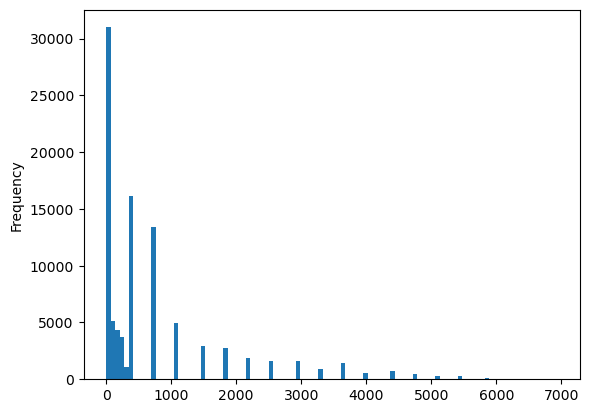

Age upon Outcome Days


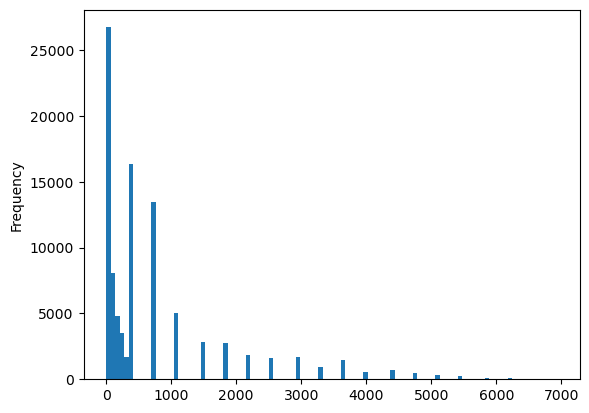

In [18]:
for c in numerical_features_all:
    print(c)
    df[c].plot.hist(bins=100)
    plt.show()

## 4. <a name="4">Scatter Plots and Correlation</a>
(<a href="#0">Go to top</a>)

### Scatter plot
Scatter plots are simple 2D plots of two numerical variables that can be used to examine the relationship between two variables. 

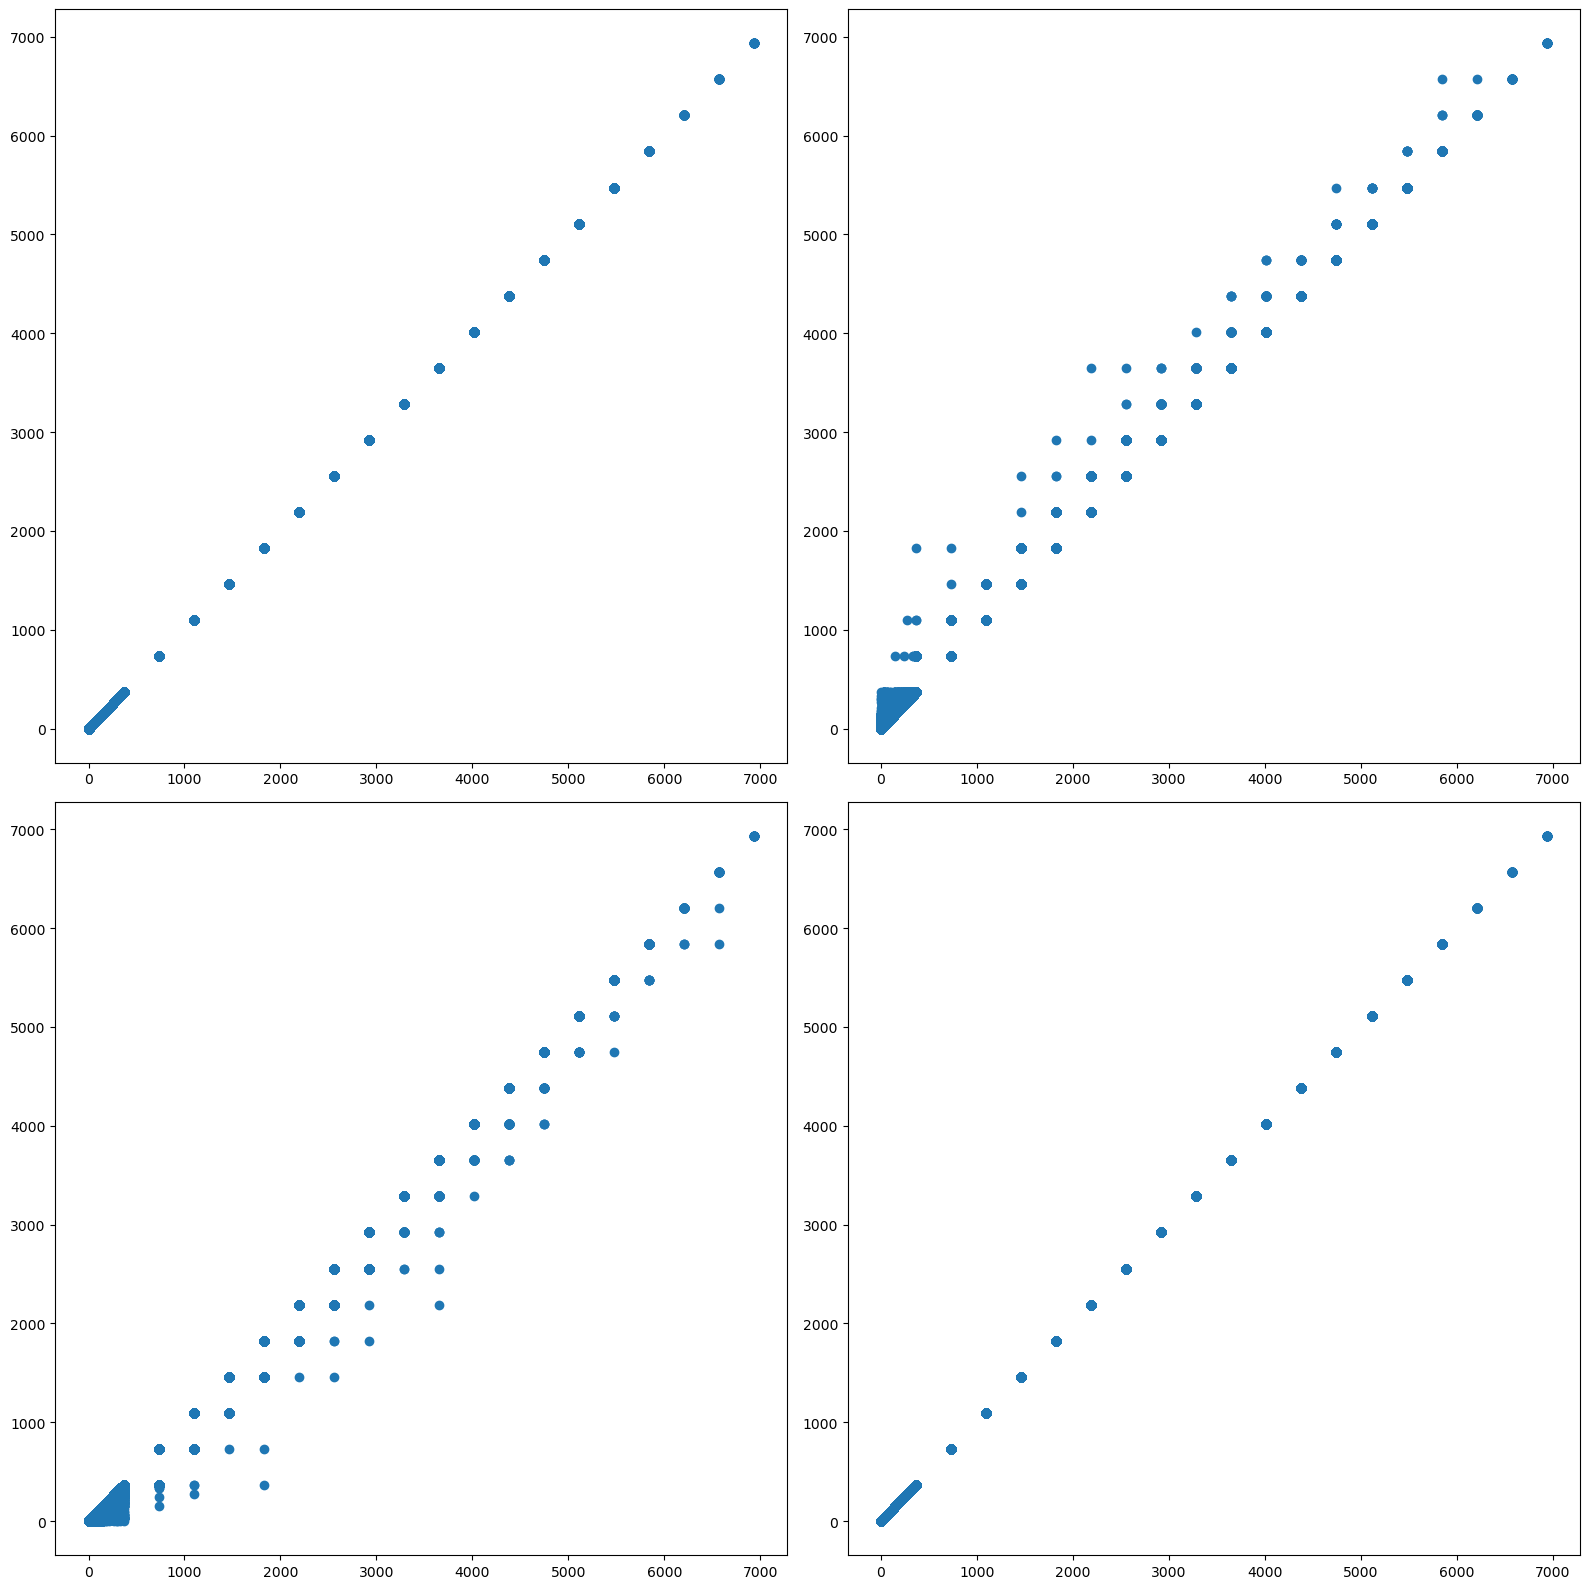

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(len(numerical_features_all), len(numerical_features_all), figsize=(16, 16), sharex=False, sharey=False)
for i in range(0,len(numerical_features_all)):
    for j in range(0,len(numerical_features_all)):
        axes[i,j].scatter(x = df[numerical_features_all[i]], y = df[numerical_features_all[j]])
fig.tight_layout()

### Scatterplot with Identification

We can also add the target values, 0 or 1, to our scatter plot.

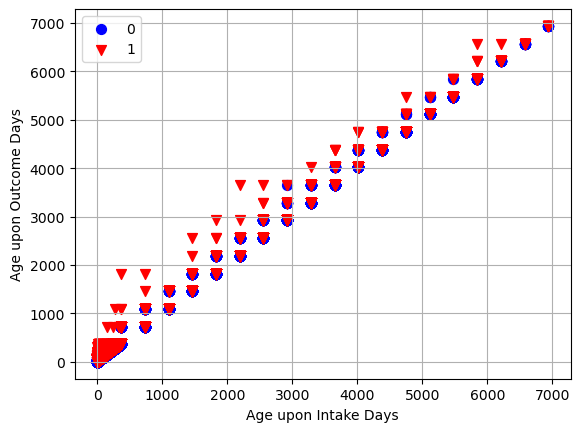

In [20]:
import seaborn as sns

X1 = df[[numerical_features_all[0], numerical_features_all[1]]][df[model_target] == 0]
X2 = df[[numerical_features_all[0], numerical_features_all[1]]][df[model_target] == 1]

plt.scatter(X1.iloc[:,0], 
            X1.iloc[:,1], 
            s=50, 
            c='blue', 
            marker='o', 
            label='0')

plt.scatter(X2.iloc[:,0], 
            X2.iloc[:,1], 
            s=50, 
            c='red', 
            marker='v', 
            label='1')

plt.xlabel(numerical_features_all[0])
plt.ylabel(numerical_features_all[1])
plt.legend()
plt.grid()
plt.show()

Scatterplots with identification, can sometimes help identify whether or not we can get good separation between the data points, based on these two numerical features alone. 

### Correlation Matrix Heatmat
We plot the correlation matrix. Correlation scores are calculated for numerical fields. 

In [21]:
cols=[numerical_features_all[0], numerical_features_all[1]]
#print(df[cols].corr())
df[cols].corr().style.background_gradient(cmap='tab20c')

,Age upon Intake Days,Age upon Outcome Days
Age upon Intake Days,1.000000,0.998839
Age upon Outcome Days,0.998839,1.000000


Similar to scatterplots, but now the correlation matrix values can more clearly pinpoint relationships between the numerical features. Correlation values of -1 means perfect negative correlation, 1 means perfect positive correlation, and 0 means there is no relationship between the two numerical features.

### A fancy example using Seaborn

<Axes: >

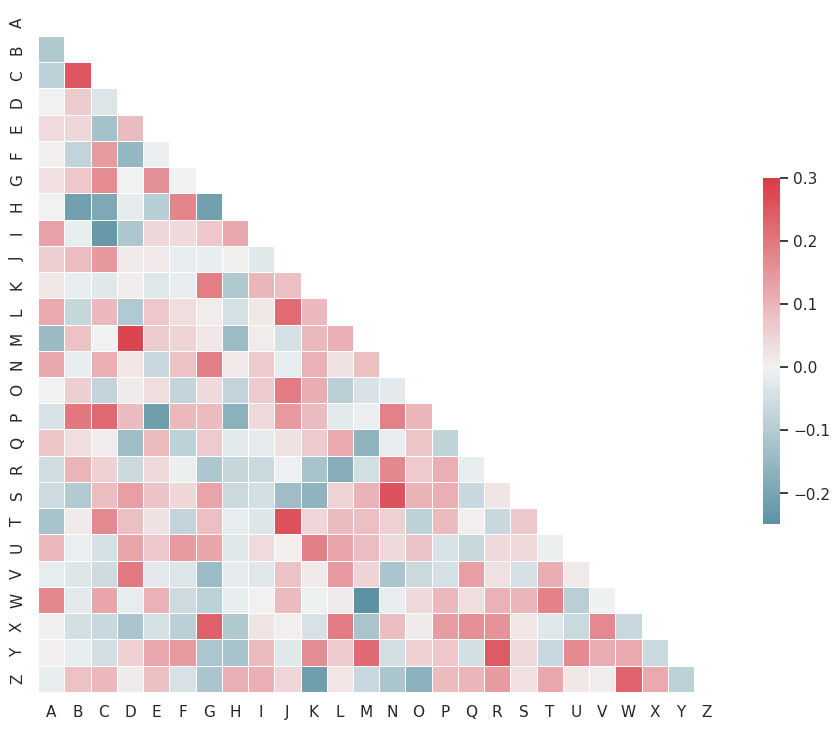

In [22]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Also, more exploratory data analysis might reveal other important hidden atributes and/or relationships of the model features considered. 

## 5. <a name="5">Handling Missing Values</a>
(<a href="#0">Go to top</a>)

  * <a href="#51">Drop columns with missing values</a>
  * <a href="#52">Drop rows with missing values</a>
  * <a href="#53"> Impute (fill-in) missing values with .fillna()</a>
  * <a href="#54"> Impute (fill-in) missing values with sklearn's SimpleImputer</a>

Let's first check the number of missing (nan) values for each column.

In [23]:
df.isna().sum()

Pet ID                       0
Outcome Type                 0
Sex upon Outcome             1
Name                     36343
Found Location               0
Intake Type                  0
Intake Condition             0
Pet Type                     0
Sex upon Intake              1
Breed                        0
Color                        0
Age upon Intake Days         0
Age upon Outcome Days        0
dtype: int64

Let's explore a few options dealing with missing values, when there are values missing on many features, both numerical and categorical types. 

### <a name="51">Drop columns with missing values</a>
(<a href="#5">Go to Handling Missing Values</a>)

We can drop some feautures/columns if we think there is significant amount of missing data in those features. Here we 
are dropping features having more than 20% missing values.

__Hint:__ You can also use __inplace=True__ parameter to drop features inplace without assignment.


In [24]:
threshold = 2/10
print((df.isna().sum()/len(df.index)))
columns_to_drop = df.loc[:,list(((df.isna().sum()/len(df.index))>=threshold))].columns    
print(columns_to_drop)

df_columns_dropped = df.drop(columns_to_drop, axis = 1)  
df_columns_dropped.head()

Pet ID                   0.000000
Outcome Type             0.000000
Sex upon Outcome         0.000010
Name                     0.380706
Found Location           0.000000
Intake Type              0.000000
Intake Condition         0.000000
Pet Type                 0.000000
Sex upon Intake          0.000010
Breed                    0.000000
Color                    0.000000
Age upon Intake Days     0.000000
Age upon Outcome Days    0.000000
dtype: float64
Index(['Name'], dtype='object')


,Pet ID,Outcome Type,Sex upon Outcome,Found Location,Intake Type,Intake Condition,Pet Type,Sex upon Intake,Breed,Color,Age upon Intake Days,Age upon Outcome Days
0,A794011,1.0,Neutered Male,Austin (TX),Owner Surrender,Normal,Cat,Neutered Male,Domestic Shorthair Mix,Brown Tabby/White,730,730
1,A776359,1.0,Neutered Male,7201 Levander Loop in Austin (TX),Stray,Normal,Dog,Intact Male,Chihuahua Shorthair Mix,White/Brown,365,365
2,A674754,0.0,Intact Male,12034 Research in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,Orange Tabby,6,6
3,A689724,1.0,Neutered Male,2300 Waterway Bnd in Austin (TX),Stray,Normal,Cat,Intact Male,Domestic Shorthair Mix,Black,60,60
4,A680969,1.0,Neutered Male,4701 Staggerbrush Rd in Austin (TX),Stray,Nursing,Cat,Intact Male,Domestic Shorthair Mix,White/Orange Tabby,7,60


In [25]:
df_columns_dropped.isna().sum()

Pet ID                   0
Outcome Type             0
Sex upon Outcome         1
Found Location           0
Intake Type              0
Intake Condition         0
Pet Type                 0
Sex upon Intake          1
Breed                    0
Color                    0
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

In [26]:
df_columns_dropped.shape

(95462, 12)

Note the reduced size of the dataset features. This can sometimes lead to underfitting models -- not having enough features to build a good model able to capture the pattern in the dataset, especially when dropping features that are essential to the task at hand. 

### <a name="52">Drop rows with missing values</a>
(<a href="#5">Go to Handling Missing Values</a>)

Here, we simply drop rows that have at least one missing value. There are other drop options to explore, depending on specific problems.

In [27]:
df_missing_dropped = df.dropna()

Let's check the missing values below.

In [28]:
df_missing_dropped.isna().sum()

Pet ID                   0
Outcome Type             0
Sex upon Outcome         0
Name                     0
Found Location           0
Intake Type              0
Intake Condition         0
Pet Type                 0
Sex upon Intake          0
Breed                    0
Color                    0
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64

In [29]:
df_missing_dropped.shape

(59118, 13)

This approach can dramatically reduce the number of data samples. This can sometimes lead to overfitting models -- especially when the number of features is greater or comparable to the number of data samples. 

### <a name="53">Impute (fill-in) missing values with .fillna()</a>
(<a href="#5">Go to Handling Missing Values</a>)

Rather than dropping rows (data samples) and/or columns (features), another strategy to deal with missing values would be to actually complete the missing values with new values: imputation of missing values.

__Imputing Numerical Values:__ The easiest way to impute numerical values is to get the __average (mean) value__ for the corresponding column and use that as the new value for each missing record in that column. 

In [30]:
# Impute numerical features by using the mean per feature to replace the nans

# Assign our df to a new df 
df_imputed = df.copy()
print(df_imputed[numerical_features_all].isna().sum())

# Impute our two numerical features with the means. 
df_imputed[numerical_features_all] = df_imputed[numerical_features_all].fillna(df_imputed[numerical_features_all].mean())

print(df_imputed[numerical_features_all].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


__Imputing Categorical Values:__ We can impute categorical values by getting the most common (mode) value for the corresponding column and use that as the new value for each missing record in that column. 

In [31]:
# Impute categorical features by using the mode per feature to replace the nans

# Assign our df to a new df 
df_imputed_c = df.copy()
print(df_imputed_c[categorical_features_all].isna().sum())

for c in categorical_features_all:
    # Find the mode per each feature
    mode_impute = df_imputed_c[c].mode()
    print(c, mode_impute)

    # Impute our categorical features with the mode
    # "inplace=True" parameter replaces missing values in place (no need for left handside assignment)
    df_imputed_c[c].fillna(False, inplace=True)

print(df_imputed_c[categorical_features_all].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36343
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64
Pet ID 0        A047759
1        A134067
2        A141142
3        A163459
4        A165752
          ...   
95457    A819862
95458    A819864
95459    A819865
95460    A819895
95461    A819908
Name: Pet ID, Length: 95462, dtype: object
Sex upon Outcome 0    Neutered Male
Name: Sex upon Outcome, dtype: object
Name 0    Bella
Name: Name, dtype: object
Found Location 0    Austin (TX)
Name: Found Location, dtype: object
Intake Type 0    Stray
Name: Intake Type, dtype: object
Intake Condition 0    Normal
Name: Intake Condition, dtype: object
Pet Type 0    Dog
Name: Pet Type, dtype: object
Sex upon Intake 0    Intact Male
Name: Sex upon Intake, dtype: object
Breed 0    Domestic Shorthair Mix
Name: Breed, dtype: object
Colo

We can also create a new category, such as "Missing", for alll or elected categorical features.

In [32]:
# Impute categorical features by using a placeholder value

# Assign our df to a new df 
df_imputed = df.copy()
print(df_imputed[categorical_features_all].isna().sum())

# Impute our categorical features with a new category named "Missing". 
df_imputed[categorical_features_all]= df_imputed[categorical_features_all].fillna("Missing")

print(df_imputed[categorical_features_all].isna().sum())

Pet ID                  0
Sex upon Outcome        1
Name                36343
Found Location          0
Intake Type             0
Intake Condition        0
Pet Type                0
Sex upon Intake         1
Breed                   0
Color                   0
dtype: int64
Pet ID              0
Sex upon Outcome    0
Name                0
Found Location      0
Intake Type         0
Intake Condition    0
Pet Type            0
Sex upon Intake     0
Breed               0
Color               0
dtype: int64


### <a name="54">Impute (fill-in) missing values with sklearn's __SimpleImputer__</a>
(<a href="#5">Go to Handling Missing Values</a>)

A more elegant way to implement imputation is using sklearn's __SimpleImputer__, a class implementing .fit() and .transform() methods.


In [33]:
# Impute numerical columns by using the mean per column to replace the nans

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputed = df.copy()
print(df_sklearn_imputed[numerical_features_all].isna().sum())

imputer = SimpleImputer(strategy='mean')
df_sklearn_imputed[numerical_features_all] = imputer.fit_transform(df_sklearn_imputed[numerical_features_all])

print(df_sklearn_imputed[numerical_features_all].isna().sum())

Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64
Age upon Intake Days     0
Age upon Outcome Days    0
dtype: int64


In [34]:
# Impute categorical columns by using the mode per column to replace the nans

# Pick some categorical features you desire to impute with this approach
categoricals_missing_values = df[categorical_features_all].loc[:,list(((df[categorical_features_all].isna().sum()/len(df.index)) > 0.0))].columns    
columns_to_impute = categoricals_missing_values[1:3]
print(columns_to_impute)

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy='most_frequent')
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(df_sklearn_imputer[columns_to_impute])

print(df_sklearn_imputer[columns_to_impute].isna().sum())

Index(['Name', 'Sex upon Intake'], dtype='object')
Name               36343
Sex upon Intake        1
dtype: int64
Name               0
Sex upon Intake    0
dtype: int64


In [35]:
# Impute categorical columns by using a placeholder "Missing"

# Pick some categorical features you desire to impute with this approach
categoricals_missing_values = df[categorical_features_all].loc[:,list(((df[categorical_features_all].isna().sum()/len(df.index)) > 0.0))].columns    
columns_to_impute = categoricals_missing_values[1:3]
print(columns_to_impute)

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[columns_to_impute].isna().sum())

imputer = SimpleImputer(strategy='constant', fill_value = "Missing")
df_sklearn_imputer[columns_to_impute] = imputer.fit_transform(df_sklearn_imputer[columns_to_impute])

print(df_sklearn_imputer[columns_to_impute].isna().sum())

Index(['Name', 'Sex upon Intake'], dtype='object')
Name               36343
Sex upon Intake        1
dtype: int64
Name               0
Sex upon Intake    0
dtype: int64
